In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pickle

plt.style.use("science.mplstyle")

from helpers.test_statistics import get_errorbands, get_errorbands_local_min
from helpers.likelihood_visualizers import make_c_grid, c_scan_1d, c_scan_2d, c_scan_3d, c_scan_3d_with_confusion


In [2]:
import yaml
with open("workflow.yaml", "r") as file:
    workflow = yaml.safe_load(file)
    
dpi = 300



# 1D

# Test statistic

In [16]:
parameter_code = "c0"
test_set = "alt_c0_m6"


results_dict = {}

with open(f"preplot_pickles/results_dict_rate_only_{parameter_code}.pkl", "rb") as f:
    temp = pickle.load(f)
    results_dict["Rate only"] = temp[test_set]
    c_scans = temp["cscans"]

with open(f"preplot_pickles/results_dict_all_{parameter_code}_f1.pkl", "rb") as f:
    results_dict["1 obs."] = pickle.load(f)[test_set]

with open(f"preplot_pickles/results_dict_all_{parameter_code}_f3.pkl", "rb") as f:
    results_dict["3 obs."] = pickle.load(f)[test_set]
"""
with open(f"preplot_pickles/results_dict_all_{parameter_code}_f5.pkl", "rb") as f:
    results_dict["5 obs."] = pickle.load(f)[test_set]
"""



'\nwith open(f"preplot_pickles/results_dict_all_{parameter_code}_f5.pkl", "rb") as f:\n    results_dict["5 obs."] = pickle.load(f)[test_set]\n'

Rate only
Lefts -8.059999999999999 Rights -4.1000000000000005

1 obs.
Lefts -6.799999999999999 Rights -5.36

3 obs.
Lefts -6.9799999999999995 Rights -6.44



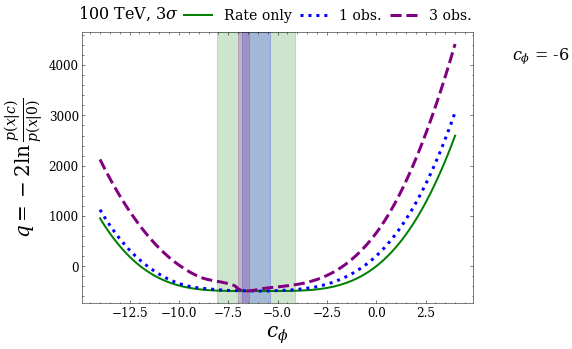

In [18]:
CL_all_dict = {}

plotting_cscan = 10*c_scans[int(parameter_code[-1])]

results_to_plot = ["Rate only", "1 obs.", "3 obs."]
#results_to_plot = ["3 obs.", "5 obs."]

for test in results_to_plot:
    CL_all_dict[test] = get_errorbands_local_min(results_dict[test], sigma = 3)


style_dicts = {
    "Rate only":{"color":"green","linestyle":"solid","lw":2},
    "1 obs.":{"color":"blue","linestyle":"dotted","lw":3},
    "3 obs.":{"color":"purple","linestyle":"dashed","lw":3},
     "5 obs.":{"color":"orange","linestyle":"dashed","lw":3},
}


fontsize = 14


plt.figure(figsize = (7,5))


for i, test in enumerate(results_to_plot):
    
    print(test)
    plt.plot(plotting_cscan, -results_dict[test], label = test, **style_dicts[test])
    
    if len(CL_all_dict[test][0]) > len(CL_all_dict[test][1]):
        CL_all_dict[test][1].append(99)
    
    
    for j in range(len(CL_all_dict[test][0])):
    
        print("Lefts", plotting_cscan[CL_all_dict[test][0][j]], "Rights", plotting_cscan[CL_all_dict[test][1][j]])
        plt.axvspan(plotting_cscan[CL_all_dict[test][0][j]], plotting_cscan[CL_all_dict[test][1][j]],
                   color = style_dicts[test]["color"], alpha = 0.2)
  
        
    print()
    
    
plt.legend(fontsize = fontsize, loc = "upper right", bbox_to_anchor=(1.03, 1.13), ncol = 3, columnspacing=0.6)

plt.text(-.01, 1.05, "100 TeV, 3$\sigma$", transform=plt.gca().transAxes, fontsize = fontsize+2)
plt.text(1.1, .9, "$c_\phi$ = -6", transform=plt.gca().transAxes, fontsize = fontsize+2)

#plt.ylim(-8000, 1900)

plt.xlabel(workflow["plotting"]["fancy_name"][parameter_code], fontsize = fontsize+6)
plt.ylabel("$q=-2\ln\\frac{p(x|c)}{p(x|0)}$", fontsize = fontsize+6)
plt.savefig(f"plots/{parameter_code}_{test_set}_100TeV_f5.pdf", dpi = dpi)
plt.show()

plt.close()


# Coverage

In [7]:
parameter_code = "c2"
test_set = "sm"
n_coverage = 20

results_dict = {}

with open(f"preplot_pickles/coverage_dict_rate_only_{parameter_code}.pkl", "rb") as f:
    temp = pickle.load(f)
    results_dict["Rate only"] = temp["sm"]
    c_scans = temp["cscans"]

with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f1.pkl", "rb") as f:
    results_dict["1 feat."] = pickle.load(f)["sm"]

with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f3.pkl", "rb") as f:
    results_dict["3 feat."] = pickle.load(f)["sm"]

with open(f"preplot_pickles/coverage_dict_all_{parameter_code}_f5.pkl", "rb") as f:
    results_dict["5 feat."] = pickle.load(f)["sm"]

    


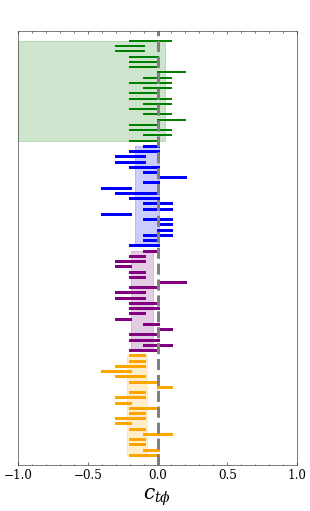

In [8]:
CL_all_dict = {}
fontsize = 14
plotting_cscan = 10*c_scans[int(parameter_code[-1])]

style_dicts = {
    "Rate only":{"color":"green","linestyle":"solid","lw":2},
    "1 feat.":{"color":"blue","linestyle":"solid","lw":3},
    "3 feat.":{"color":"purple","linestyle":"solid","lw":3},
    "5 feat.":{"color":"orange","linestyle":"solid","lw":3},
}

def plotting_helper(CL_output, test, i, y_position, plot_label = True):
    low_to_high, high_to_low = CL_output
    if (len(low_to_high) > len(high_to_low)) or len(high_to_low) == 0:
            high_to_low.append(100)
    if len(low_to_high) < len(high_to_low):
        low_to_high.append(0)
    for j in range(len(low_to_high)):       
        if j == 0 and plot_label: label = test 
        else: label = None
        plt.plot([plotting_cscan[low_to_high[j]], plotting_cscan[high_to_low[j]]], [y_position, y_position], label = label, **style_dicts[test])
    y_position -= 1
    return y_position, plotting_cscan[low_to_high[0]], plotting_cscan[high_to_low[-1]]


for test in results_dict.keys():
    CL_all_dict[test] = {c:0 for c in range(n_coverage)}
    for c in range(n_coverage):
        CL_all_dict[test][c] = get_errorbands_local_min(results_dict[test][c], sigma = 1)


plt.figure(figsize = (5,8))

y_position = 0

if parameter_code == "c0":
    ylim_lower = -19
elif parameter_code == "c1":
    ylim_lower = -4
elif parameter_code == "c2":
    ylim_lower = -8

for i, test in enumerate(results_dict.keys()):
    
    #plt.text(ylim_lower, y_position-n_coverage*.5, test, rotation = 0, fontsize = fontsize, color = style_dicts[test]["color"])

    # also store information for the mean interval
    lefts, rights = [], []
    starting_y = y_position

    for c in range(n_coverage):
        if c == 0: plot_label = True
        else: plot_label = False
        y_position, loc_left, loc_right = plotting_helper(CL_all_dict[test][c], test, i, y_position, plot_label)
        lefts.append(loc_left)
        rights.append(loc_right)

    ending_y = y_position
    # plot the mean interval

    plt.fill_between([np.mean(lefts), np.mean(rights)], starting_y, y2=ending_y+1, color = style_dicts[test]["color"], alpha = 0.2)
    
    
        
        
    
plt.axvline(0, color = "grey", linestyle = "dashed", lw = 3)
#plt.legend(fontsize = fontsize, loc = "upper left")

if parameter_code == "c0":
    plt.text(0, 1.03, "100 TeV, 3$\sigma$ CI", transform=plt.gca().transAxes, fontsize = fontsize+2)
else:
    plt.text(0, 1.03, "100 TeV, 3$\sigma$ CI", transform=plt.gca().transAxes, fontsize = fontsize+2, color = "white")
plt.xlabel(workflow["plotting"]["fancy_name"][parameter_code], fontsize = fontsize+6)

plt.yticks([])
plt.ylim(-81, 2)
plt.xlim(-1, 1)

plt.savefig(f"plots/{parameter_code}_coverage_100TeV.pdf", dpi = dpi)
plt.show()
plt.close()


# 2D

In [18]:
parameter_code = "c0c2"

test_set = "sm"
target = [0,0,0]

# weird f5
#test_set = "alt_c0c1_m10p2p0"
#target = [-1, 0.2, 0]

# good
test_set = "alt_c0c1_p3m2p0"
target = [0.3, -0.2, 0]

# biased
#test_set = "alt_c0c1_m4p1p0"
#target = [-.4, 0.1, 0]

# good
#test_set = "alt_c0c2_m10p0p3"
#target = [-1, 0, 0.3]

# good
test_set = "alt_c0c2_p3p0m2"
target = [0.3 ,0.0, -0.2]

# good conflict -- 5 good, 3 bad
#test_set = "alt_c0c2_m4p0p3"
#target = [-0.4, 0.0 ,0.3]

# degen failure
#test_set = "alt_c1c2_p0m2p2"
#target = [0, -0.2, 0.2]

# degen failure
#test_set = "alt_c1c2_p0m3p1"
#target = [0, -0.3, 0.1]

# degen failure
#test_set = "alt_c1c2_p0m1p3"
#target = [0, -0.1, 0.3]

results_dict = {}

with open(f"preplot_pickles/results_dict_all_{parameter_code}_f1.pkl", "rb") as f:
    results_dict["1 obs."] = pickle.load(f)[test_set]

with open(f"preplot_pickles/results_dict_all_{parameter_code}_f3.pkl", "rb") as f:
    results_dict["3 obs."] = pickle.load(f)[test_set]

with open(f"preplot_pickles/results_dict_all_{parameter_code}_f5.pkl", "rb") as f:
    results_dict["5 obs."] = pickle.load(f)[test_set]
    

with open(f"preplot_pickles/results_dict_rate_only_{parameter_code}.pkl", "rb") as f:
    temp = pickle.load(f)
    results_dict["Rate only"] = temp[test_set].reshape(results_dict["1 obs."].shape[0], results_dict["1 obs."].shape[1])
    c_scans = temp["cscans"]
    c_grid = temp["cgrid"]
    edges = temp["edges"]

cmin = np.max(results_dict["1 obs."])
cmax = np.min(results_dict["1 obs."])


best_fits = {}
for key in results_dict.keys():

    max_index = np.argmax(results_dict[key])
    best_fits[key] = c_grid[max_index]

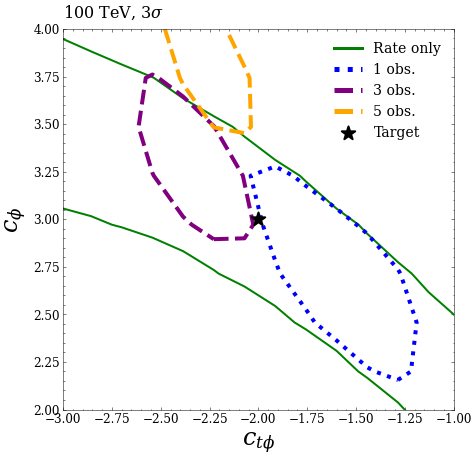

In [21]:
lw = 3
fontsize = 14


results_to_plot = ["Rate only", "1 obs.", "3 obs.", "5 obs."]
#results_to_plot = ["3 obs.", "5 obs."]


marginal_0_dict = {}
marginal_1_dict = {}

if parameter_code[1]+parameter_code[3] == "01":
    for key in results_dict.keys():
        index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
        index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
        marginal_0_dict[key] = results_dict[key][index1,:]
        marginal_1_dict[key] = results_dict[key][:,index0]
    ind0 = 0
    ind1 = 1


elif parameter_code[1]+parameter_code[3] == "02":
    for key in results_dict.keys():
        index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
        index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
        marginal_0_dict[key] = results_dict[key][index0,:]
        marginal_1_dict[key] = results_dict[key][:,index2]
    ind0 = 2
    ind1 = 0


elif parameter_code[1]+parameter_code[3] == "12":
    for key in results_dict.keys():
        index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
        index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
        marginal_0_dict[key] = results_dict[key][:,index2]
        marginal_1_dict[key] = results_dict[key][index1,:]
        results_dict[key] = results_dict[key].T
    ind0 = 1
    ind1 = 2
    


X, Y = np.meshgrid(10*c_scans[ind0], 10*c_scans[ind1])

sigma = 3
style_dicts = {
    "Rate only":{"colors":"green","linestyles":"solid","linewidths":2},
    "1 obs.":{"colors":"blue","linestyles":"dotted","linewidths":4},
    "3 obs.":{"colors":"purple","linestyles":"dashed","linewidths":4},
    "5 obs.":{"colors":"orange","linestyles":"dashed","linewidths":4},
}

style_dicts_lines = {
    "Rate only":{"color":"green","linestyle":"solid","lw":3},
    "1 obs.":{"color":"blue","linestyle":"dotted","lw":5},
    "3 obs.":{"color":"purple","linestyle":"dashed","lw":5},
    "5 obs.":{"color":"orange","linestyle":"dashed","lw":5},
}


fig, ax = plt.subplots(1, 1, figsize=(7, 7))

for i, key in enumerate(results_to_plot):
    
    
    chi2_vals = {1:{1:0.94890, # {dof:{sigma:}}
                2:3.84146,
                3:6.63490},
             2:{1:2.21733,
                2:5.99146,
                3:9.21034}
            }
    
    lower_ordinate = np.max(results_dict[key]) - chi2_vals[2][sigma]

    CS = ax.contour(X, Y, results_dict[key], levels = [lower_ordinate], **style_dicts[key])
    
    # label
    ax.plot([np.NaN, np.NaN],[np.NaN, np.NaN], label = key, **style_dicts_lines[key])


ax.scatter(10*target[ind0], 10*target[ind1], s=200, facecolors='black', edgecolors='black', linewidth = 2, label = "Target", marker = "*", zorder = 10)

   
ax.set_xlabel(workflow["plotting"]["fancy_name"][f"c{ind0}"], fontsize = fontsize+10)
ax.set_ylabel(workflow["plotting"]["fancy_name"][f"c{ind1}"], fontsize = fontsize+10)

plt.text(0, 1.03, f"100 TeV, {sigma}$\sigma$", transform=plt.gca().transAxes, fontsize = fontsize+2)

ax.legend(frameon = False, loc = "upper right", fontsize = fontsize)


plt.ylim(2, 4)
plt.xlim(-3, -1)


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"plots/{parameter_code}_{test_set}_sigma{sigma}_100TeV.pdf", dpi = dpi)
plt.show()

plt.close()
    
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best fit: [ 0.09142857  0.         -0.56857143]


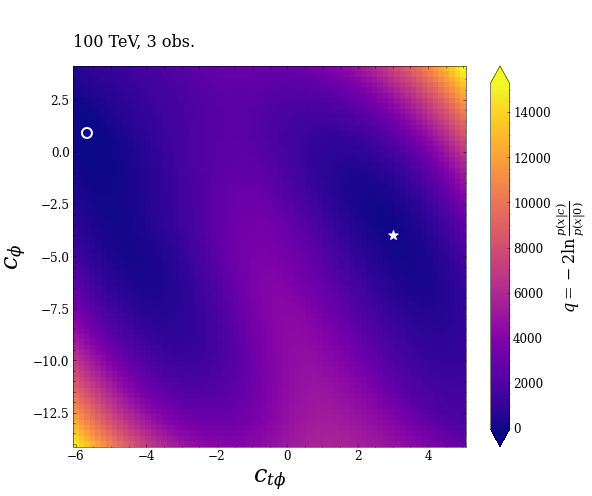

'\nfig, ax = plt.subplots(2, 2, figsize=(7, 7), gridspec_kw={\'width_ratios\': [3, 1], \'height_ratios\': [1, 3]})\nax[0, 1].axis("off")\n\n# 2d colormesh\npcm = ax[1, 0].pcolormesh(10*edges[ind0], 10*edges[ind1], results_dict[best_fit_key], norm=matplotlib.colors.Normalize(vmin=cmin, vmax=cmax),cmap=cmap,)\ncbar = plt.colorbar(pcm, ax=ax[1,1], extend="both")\n# plot best fit\nax[1, 0].scatter(10*best_fits[best_fit_key][ind0], 10*best_fits[best_fit_key][ind1], s=100.0, color="black", marker="*",)\n# plot target\nax[1, 0].scatter(10*target[ind0], 10*target[ind1], s=100, facecolors=\'none\', edgecolors=\'black\', linewidth = 2)\n\n# marginals\nfor i, key in enumerate(results_dict.keys()):\n    ax[0, 0].plot(plotting_cscan0, marginal_0_dict[key], color = colors[i], lw = lw, label = key)\n    ax[0, 0].axvline(plotting_cscan0[CL_0_dict[key][0]], color = colors[i], linestyle = "dashed", lw = lw - 1)\n    ax[0, 0].axvline(plotting_cscan0[CL_0_dict[key][2]], color = colors[i], linestyle = "das

In [11]:

fontsize = 14


marginal_0_dict = {}
marginal_1_dict = {}

if parameter_code[1]+parameter_code[3] == "01":
    for key in results_dict.keys():
        index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
        index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
        marginal_0_dict[key] = results_dict[key][index1,:]
        marginal_1_dict[key] = results_dict[key][:,index0]
    ind0 = 0
    ind1 = 1


elif parameter_code[1]+parameter_code[3] == "02":
    for key in results_dict.keys():
        index0 = np.where(c_scans[0] == best_fits[key][0])[0][0]
        index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
        marginal_0_dict[key] = results_dict[key][index0,:]
        marginal_1_dict[key] = results_dict[key][:,index2]
    ind0 = 2
    ind1 = 0


elif parameter_code[1]+parameter_code[3] == "12":
    for key in results_dict.keys():
        index1 = np.where(c_scans[1] == best_fits[key][1])[0][0]
        index2 = np.where(c_scans[2] == best_fits[key][2])[0][0]
        marginal_0_dict[key] = results_dict[key][:,index2]
        marginal_1_dict[key] = results_dict[key][index1,:]
        results_dict[key] = results_dict[key].T
    ind0 = 1
    ind1 = 2
    
CL_0_dict, CL_1_dict = {}, {}

for key in marginal_0_dict.keys():
    CL_0_dict[key] = get_errorbands(marginal_0_dict[key], sigma = 3, n_dof = 2)
    CL_1_dict[key] = get_errorbands(marginal_1_dict[key], sigma = 3, n_dof = 2)

    
plotting_cscan0 = 10*c_scans[ind0]
plotting_cscan1 = 10*c_scans[ind1]


best_fit_key = "3 obs."
print("Best fit:", best_fits[best_fit_key])


cmap = "plasma"
plt.figure(figsize = (8.8, 7))

# 2d colormesh
pcm = plt.pcolormesh(10*edges[ind0], 10*edges[ind1], -results_dict[best_fit_key],cmap=cmap,)
cbar = plt.colorbar(pcm, extend="both")
# plot best fit
plt.scatter(10*best_fits[best_fit_key][ind0], 10*best_fits[best_fit_key][ind1], linewidth = 2,s=100.0,facecolors='none', edgecolors='white')
# plot target
plt.scatter(10*target[ind0], 10*target[ind1], s=100, marker="*", color="white")

   

plt.xlabel(workflow["plotting"]["fancy_name"][f"c{ind0}"], fontsize = fontsize+10)
plt.ylabel(workflow["plotting"]["fancy_name"][f"c{ind1}"], fontsize = fontsize+10)
cbar.set_label(r"$q=-2\ln\frac{p(x|c)}{p(x|0)}$", fontsize = fontsize+2)

plt.legend(fontsize = fontsize, bbox_to_anchor=(1., 1.15), loc = "center")

plt.text(0.0, 1.05, f"100 TeV, {best_fit_key}", transform=plt.gca().transAxes, fontsize = fontsize+2)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"plots/ll_{parameter_code}_{test_set}_sigma{sigma}_100TeV.pdf", dpi = dpi)
plt.show()

plt.close()
